# Importing Libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head

<bound method NDFrame.head of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1  

# to find the shape of dataset we can use dataset.shape

In [227]:
dataset.shape

(1156, 7)

to understand data more deeply, we need to know to null value count and data type

In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocesing

Given the significant number of null values in the PURPOSE column, we'll be filling these gaps with the keyword 'EMPTY'. However, you are welcome to experiment with other methods as well.

In [235]:
dataset['PURPOSE'].fillna("EMPTY", inplace=True)

# Change the START_DATE and END_DATE to date_time formate

In [237]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

# Splitting the START_DATE into four different categories

In [239]:
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

dataset['day_night'] = pd.cut(x = dataset['time'], bins = [0, 10, 15, 19, 24], labels = ['Morning', 'Afternoon', 'Evrning', 'night'])

we can now drop rows with null values

In [241]:
dataset.dropna(inplace=True)

In [243]:
dataset.drop_duplicates(inplace=True)

# Data Visualization

Check unique values in dataset

In [245]:
obj = (dataset.dtypes=='object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

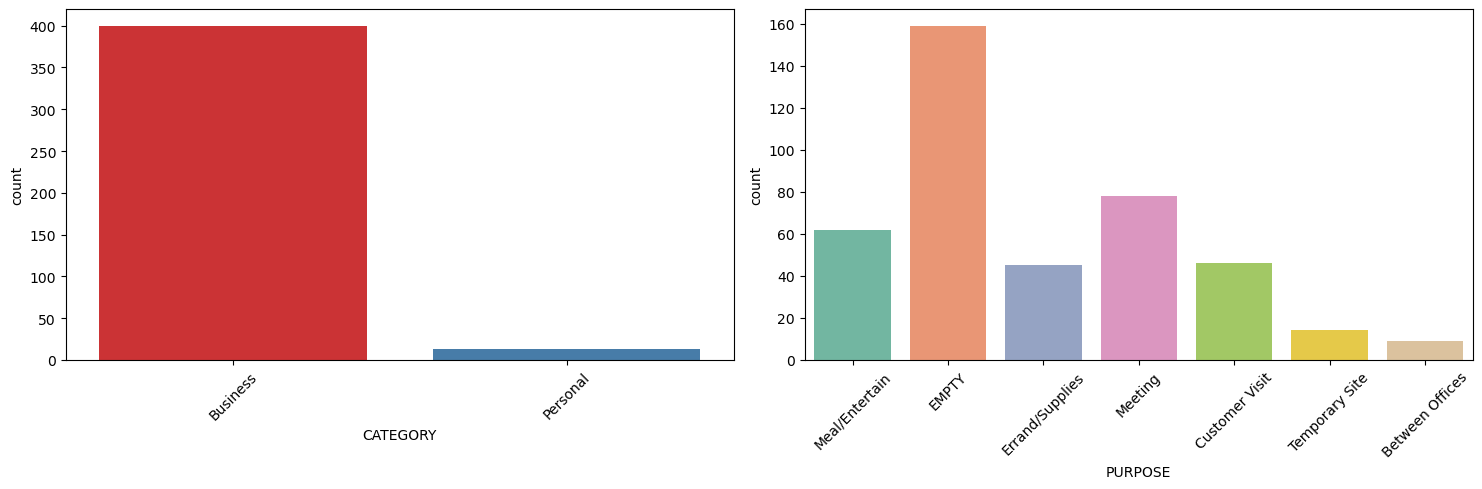

In [247]:
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# First subplot for 'CATEGORY'
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset, hue='CATEGORY', palette='Set1', dodge=False, legend=False)
plt.xticks(rotation=45)  # Change rotation angle to 45 degrees

# Second subplot for 'PURPOSE'
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=dataset, hue='PURPOSE', palette='Set2', dodge=False, legend=False) 
plt.xticks(rotation=45)  # Change rotation angle to 45 degrees


plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

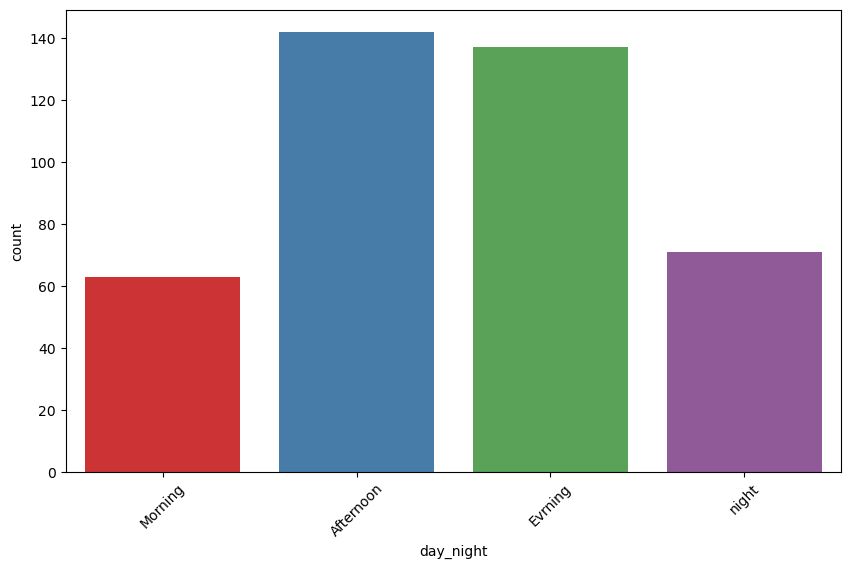

In [205]:
plt.figure(figsize=(10, 6)) 

sns.countplot(x='day_night', data=dataset, hue='day_night', palette='Set1', dodge=False, legend=False) 
plt.xticks(rotation=45)  

plt.show()

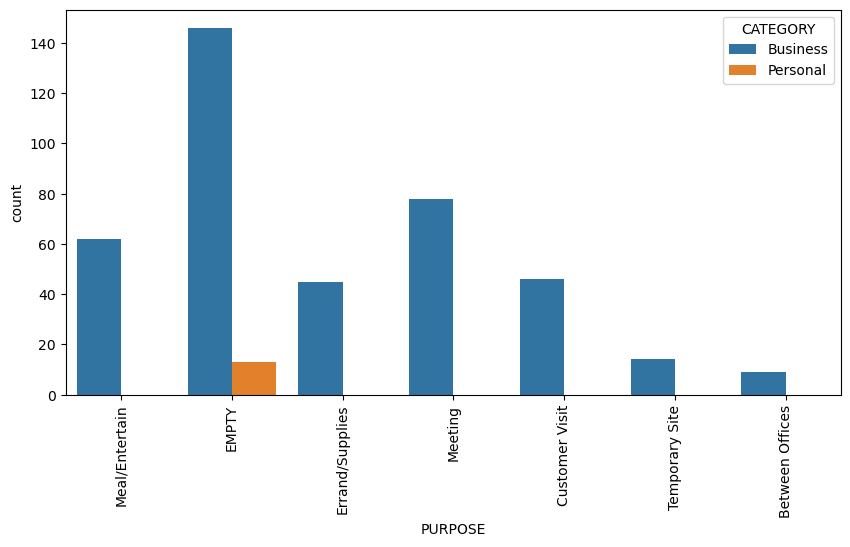

In [249]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

# OneHotEncoder

We'll be converting the categories in the 'CATEGORY' and 'PURPOSE' columns into numerical format using OneHotEncoder for better analysis.

In [251]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

# we can now find the correlation between the columns using heatmap.

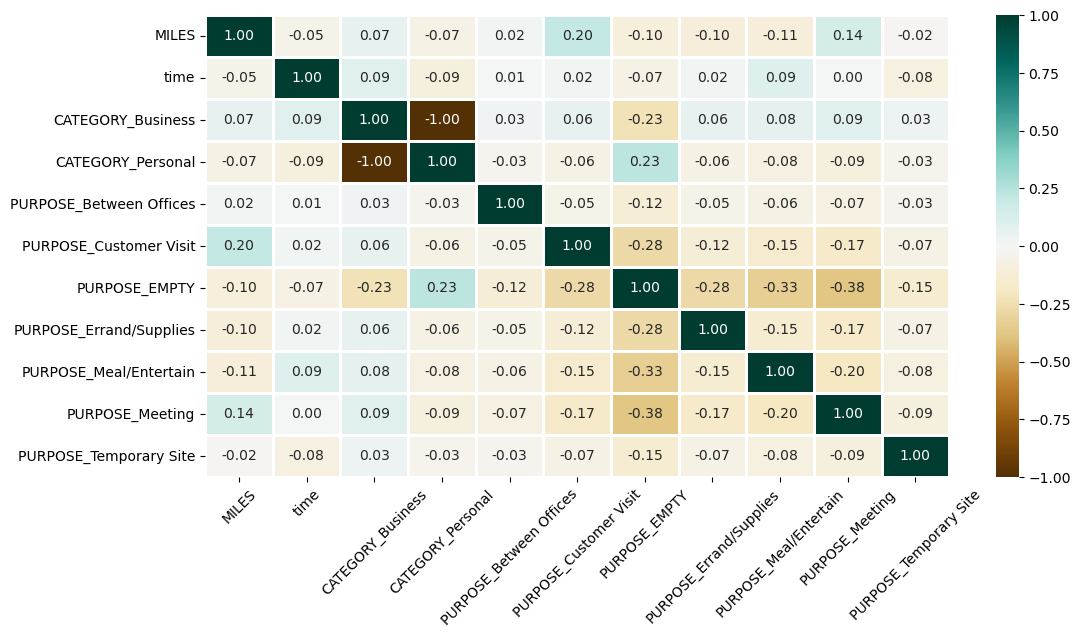

In [253]:
numeric_data = dataset.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.xticks(rotation=45)
plt.show()

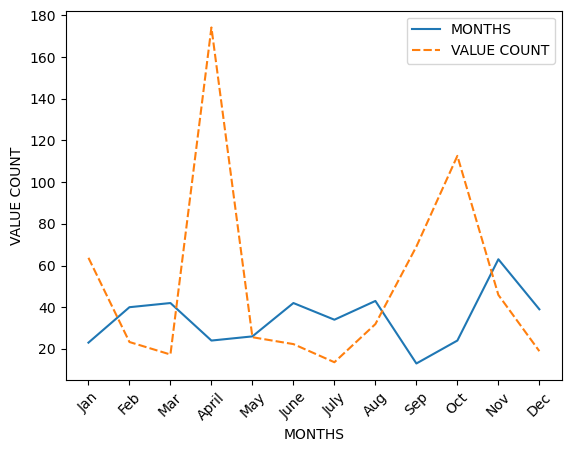

In [267]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)
 
mon = dataset.MONTH.value_counts(sort=False)
 
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})
 
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")
plt.xticks(rotation=45)
plt.show()

# Visualization for days data.

In [270]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

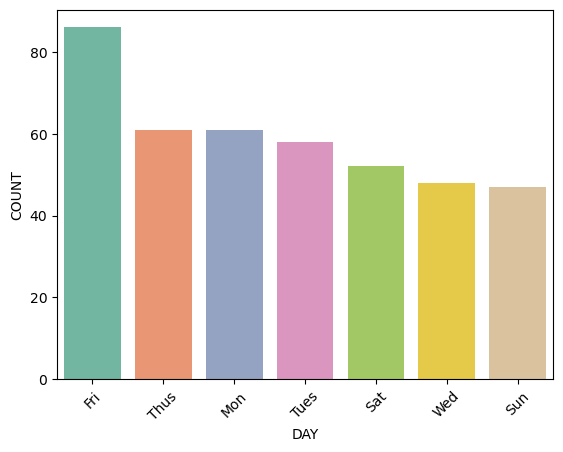

In [280]:
day_label = dataset.DAY.value_counts().reset_index()
day_label.columns = ['DAY', 'COUNT']

# Create a color palette with different colors
colors = sns.color_palette("Set2", len(day_label))

# Plot with different colors
sns.barplot(data=day_label, x='DAY', y='COUNT', palette=colors, hue='DAY', dodge=False, legend=False)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.xticks(rotation=45)
plt.show()

#  MILES Column

use boxplot to check the distribution of the column.

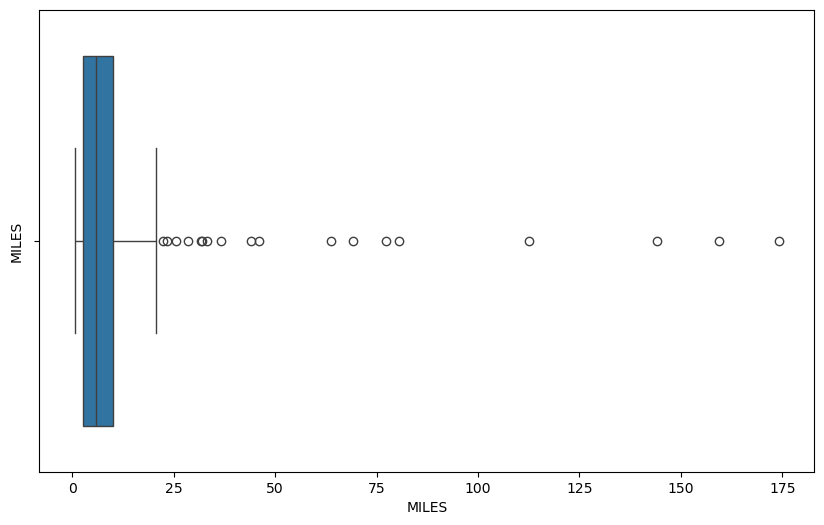

In [298]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['MILES'])
plt.ylabel('MILES')
plt.show()

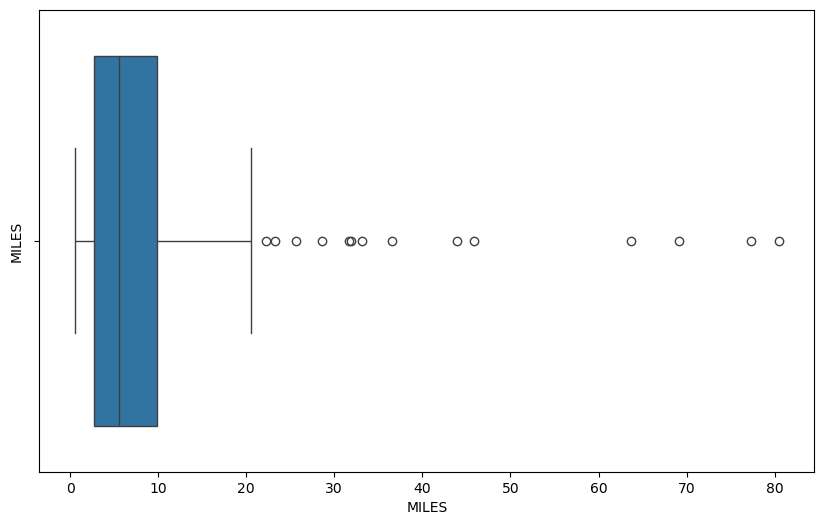

In [304]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset[dataset['MILES']<100]['MILES'])
plt.ylabel('MILES')
plt.show()

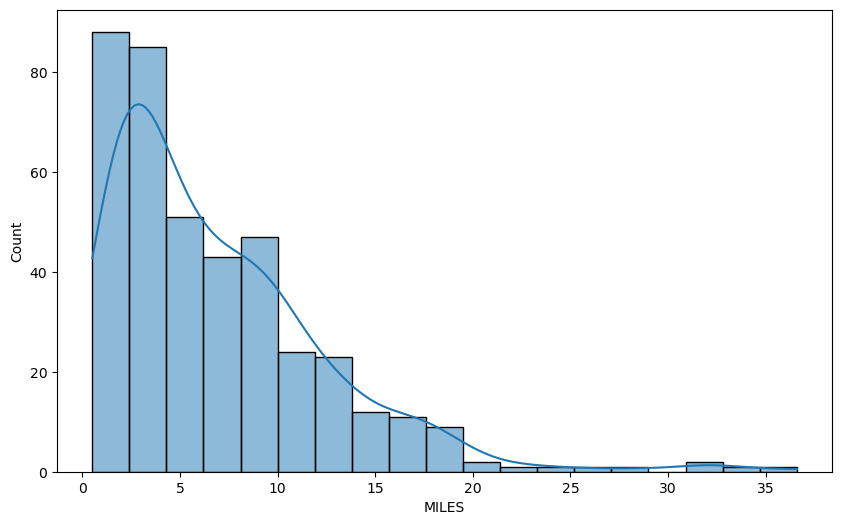

In [314]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset[dataset['MILES'] < 40], x='MILES', kde=True)
plt.xlabel('MILES')
plt.show()

In [ ]:
Conclusion: 